Chapter 8 Tree Based Methods - Question 10

In [23]:
library(ISLR)
library(gbm)
summary(Hitters)

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

# a

In [12]:
hitters_dataset = na.omit(Hitters)

In [13]:
hitters_dataset$Salary = log(hitters_dataset$Salary)

# b

In [54]:
set.seed(1)
train = sample(1:nrow(hitters_dataset),200)

# c

In [55]:
lambda = seq(0.1,0.9,0.1)

In [56]:
boost.model = gbm(Salary~.,data=hitters_dataset[train,],n.trees=1000,shrinkage=0.2,distribution="gaussian",
                  interaction.depth=4)

In [57]:
yhat = predict(boost.model,hitters_dataset[train,],n.trees=1000)
mean((yhat-hitters_dataset$Salary[train])^2)

[1] 1.365013e-05

In [58]:
mse = c()
for(i in 1:length(lambda)){
    boost.model = gbm(Salary~.,data=hitters_dataset[train,],n.trees=1000,shrinkage=lambda[i],distribution="gaussian",
                      interaction.depth=4)
    yhat = predict(boost.model,newdata=hitters_dataset[train,],n.trees=1000)
    mse[i]=mean((yhat-hitters_dataset$Salary[train])^2)
}

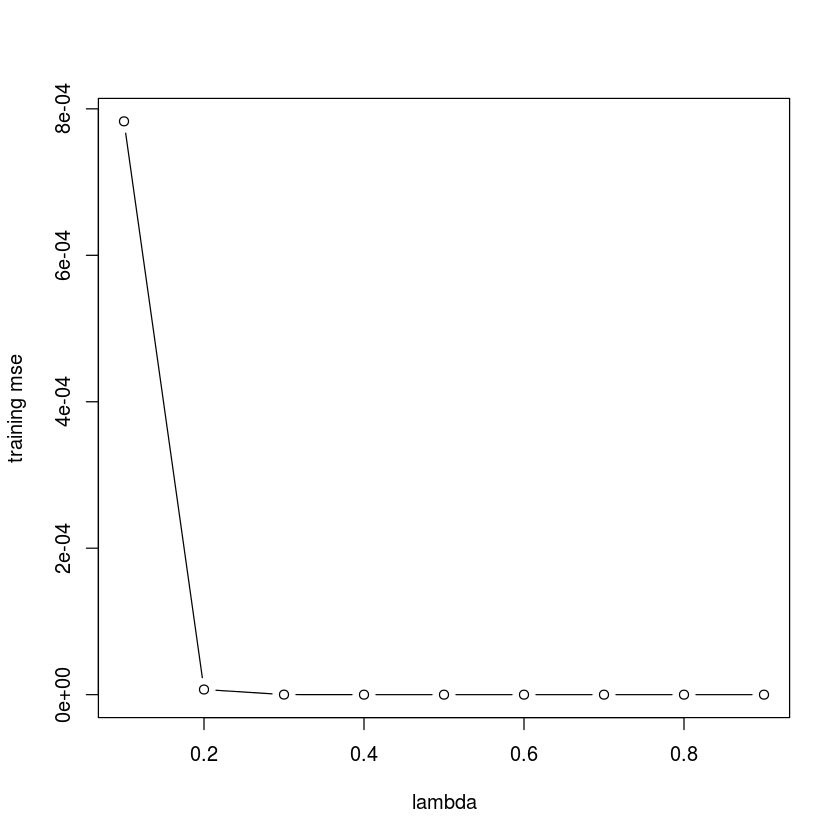

In [63]:
plot(lambda,mse,type="b",ylab="training mse")

# d

In [65]:
mse = c()
for(i in 1:length(lambda)){
    boost.model = gbm(Salary~.,data=hitters_dataset[train,],n.trees=1000,shrinkage=lambda[i],distribution="gaussian",
                      interaction.depth=4)
    yhat = predict(boost.model,newdata=hitters_dataset[-train,],n.trees=1000)
    mse[i]=mean((yhat-hitters_dataset$Salary[-train])^2)
}

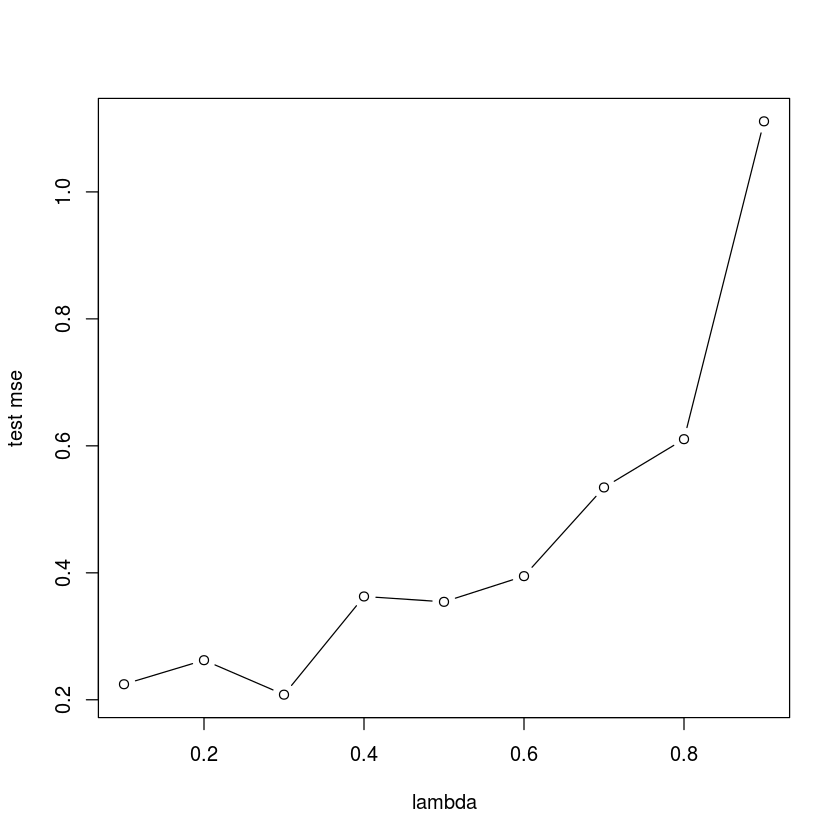

In [67]:
plot(lambda,mse,ylab="test mse",type="b")

In [71]:
#Learning rate that gives the lowest test mse
lambda[which.min(mse)]

[1] 0.3

In [73]:
#lowest test mse
min(mse)

[1] 0.2080673

# e

In [74]:
#The test mse of Linear Regression Model
lm.model = lm(Salary~.,data=hitters_dataset,subset=train)
yhat = predict(lm.model,newdata=hitters_dataset[-train,])
mean((yhat-hitters_dataset$Salary[-train])^2)

[1] 0.3938666

In [78]:
#Linear Regression with best subset selection
library(leaps)
bs.model = regsubsets(Salary~.,data=hitters_dataset,nvmax=19)
bs.model.summary = summary(bs.model)

In [79]:
names(bs.model.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

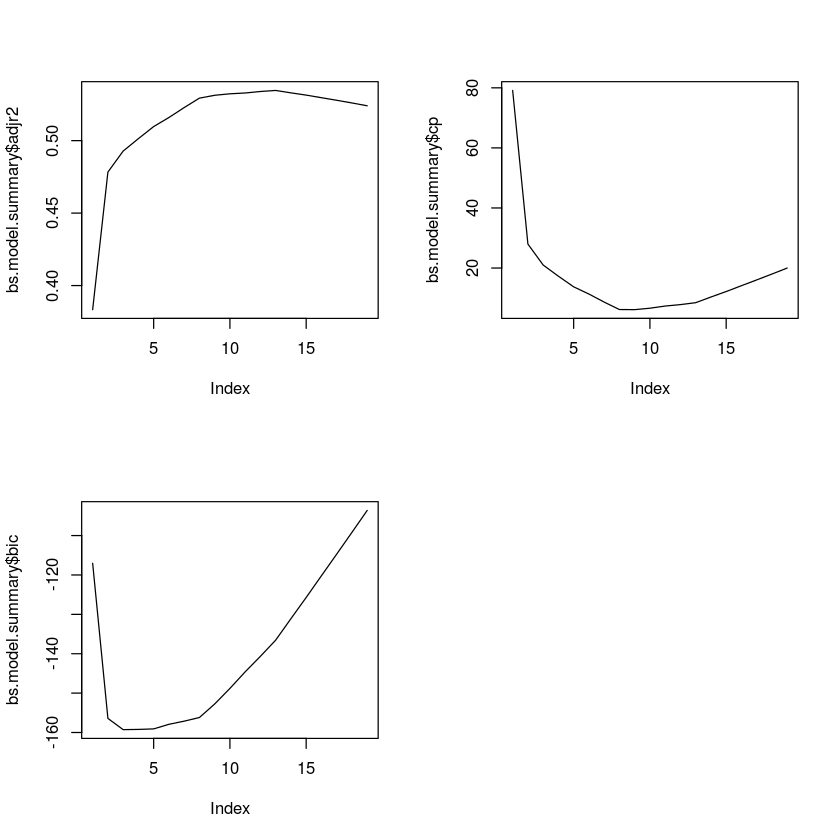

In [85]:
par(mfrow=c(2,2))
plot(bs.model.summary$adjr2,type="l")
plot(bs.model.summary$cp,type="l")
plot(bs.model.summary$bic,type="l")

In [89]:
#no. of predictors that give the highest adjusted R-squared value
which.max(bs.model.summary$adjr2)

[1] 13

In [90]:
#no. of predictors that give the lowest cp value
which.min(bs.model.summary$cp)

[1] 9

In [92]:
#no. of predictors that give the lowest bic
which.min(bs.model.summary$bic)

[1] 3

In [115]:
#mse for model with 13 variables
n = names(coef(bs.model,13))
test.mat = model.matrix(Salary~.,data=hitters_dataset[-train,])
yhat = test.mat[,n]%*%coef(bs.model,13)
mean((yhat-hitters_dataset$Salary[-train])^2)

[1] 0.2422338

In [116]:
#mse for model with 9 variables
n = names(coef(bs.model,9))
test.mat = model.matrix(Salary~.,data=hitters_dataset[-train,])
yhat = test.mat[,n]%*%coef(bs.model,9)
mean((yhat-hitters_dataset$Salary[-train])^2)

[1] 0.2612739

In [117]:
#mse for model with 3 variables
n = names(coef(bs.model,3))
test.mat = model.matrix(Salary~.,data=hitters_dataset[-train,])
yhat = test.mat[,n]%*%coef(bs.model,3)
mean((yhat-hitters_dataset$Salary[-train])^2)

[1] 0.2506831

In part (d) of this question we can see that boosting gives a model with a test mse of 0.2 which is lower than the mse of the Linear Regression models obtained with and without the best subset selection algorithm.

# f

,var,rel.inf
CRBI,CRBI,22.3654877
RBI,RBI,7.6115471
PutOuts,PutOuts,7.2129052
CWalks,CWalks,7.0474275
Walks,Walks,6.2574998
AtBat,AtBat,5.4665939
Assists,Assists,4.7977665
CHmRun,CHmRun,4.5353878
CHits,CHits,4.4261210
Runs,Runs,4.3462279


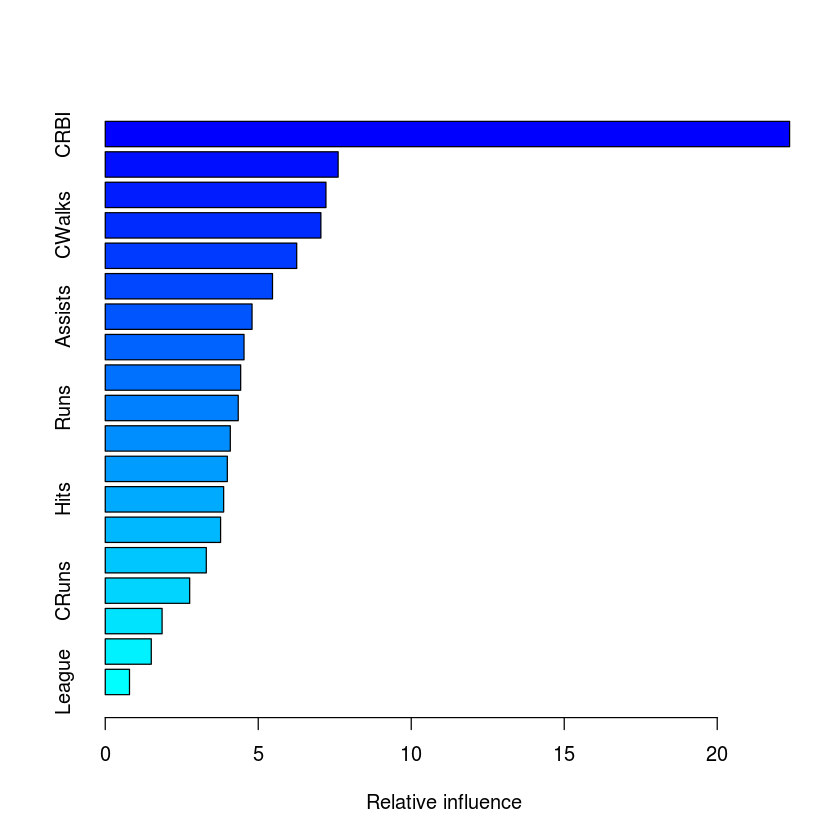

In [118]:
summary(boost.model)

CRBI is the most important variable in the boosted model. RBI, PutOuts and CWalks are second most important variables.

# g

In [120]:
library(randomForest)

In [121]:
p = ncol(hitters_dataset)-1
bag.model = randomForest(Salary~.,data=hitters_dataset[train,],n.trees=500,mtry=p)

In [123]:
#mse of bagging algorithm
yhat = predict(bag.model,newdata=hitters_dataset[-train,])
mean((yhat-hitters_dataset$Salary[-train])^2)

[1] 0.1162892

Bagging gives mse of 0.11, which is lower than the mse of all the models trained in this exercise.